In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("StockPricesDataSet.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
df.shape

(497472, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])
print("Type de la colonne 'Date' après conversion :", df['date'].dtype)

Type de la colonne 'Date' après conversion : datetime64[ns]


In [6]:
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [7]:
df = df.dropna(subset=['open'])

In [8]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
df.describe()

,date,open,high,low,close,volume
count,497461,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,2016-01-06 17:16:56.524310016,86.352275,87.132717,85.552616,86.368586,4.253695e+06
min,2014-01-02 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2015-01-08 00:00:00,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,2016-01-11 00:00:00,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,2017-01-06 00:00:00,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2017-12-29 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,101.471228,102.312340,100.571231,101.471516,8.232210e+06


Nombre d'occurrences pour chaque symbole:
symbol
AAL     1007
ITW     1007
NUE     1007
NTRS    1007
NTAP    1007
        ... 
DXC      189
BHGE     126
BHF      116
DWDP      83
APTV      18
Name: count, Length: 505, dtype: int64

Nombre total de symboles uniques: 505


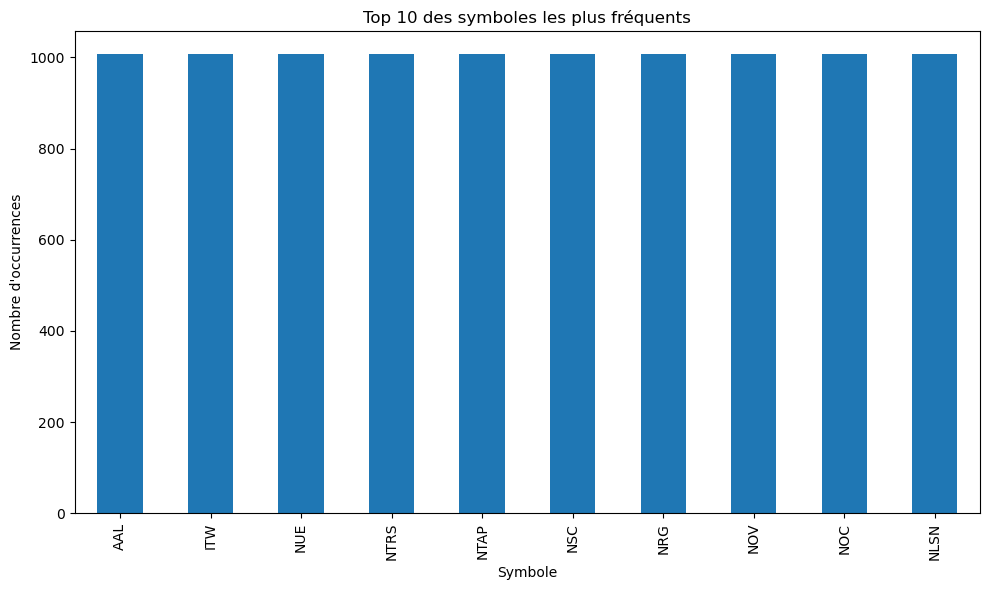

In [10]:
symbol_counts = df['symbol'].value_counts()

print("Nombre d'occurrences pour chaque symbole:")
print(symbol_counts)

print(f"\nNombre total de symboles uniques: {len(symbol_counts)}")

top_n = 10
symbol_counts.head(top_n).plot(kind='bar', figsize=(10, 6))

plt.title(f'Top {top_n} des symboles les plus fréquents')
plt.xlabel('Symbole')
plt.ylabel('Nombre d\'occurrences')
plt.tight_layout()
plt.show()

In [11]:
# 1. Statistiques descriptives de la distribution
print("Statistiques descriptives de la distribution des symboles:")
stats = pd.DataFrame({
    'Nombre total de symboles uniques': len(symbol_counts),
    'Symbole le plus fréquent': symbol_counts.index[0],
    'Nombre maximal d\'occurrences': symbol_counts.max(),
    'Nombre minimal d\'occurrences': symbol_counts.min(),
    'Nombre moyen d\'occurrences': symbol_counts.mean(),
    'Médiane des occurrences': symbol_counts.median()
}, index=[0]).T
print(stats)

Statistiques descriptives de la distribution des symboles:
                                           0
Nombre total de symboles uniques         505
Symbole le plus fréquent                 AAL
Nombre maximal d'occurrences            1007
Nombre minimal d'occurrences              18
Nombre moyen d'occurrences        985.071287
Médiane des occurrences               1007.0


In [12]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])
print(f"Type de la colonne 'date': {df['date'].dtype}")

print(f"\nLa colonne date est de type datetime: {pd.api.types.is_datetime64_any_dtype(df['date'])}")

print(f"\nPériode couverte par les données:")
print(f"Date la plus ancienne: {df['date'].min()}")
print(f"Date la plus récente: {df['date'].max()}")

Type de la colonne 'date': datetime64[ns]

La colonne date est de type datetime: True

Période couverte par les données:
Date la plus ancienne: 2014-01-02 00:00:00
Date la plus récente: 2017-12-29 00:00:00


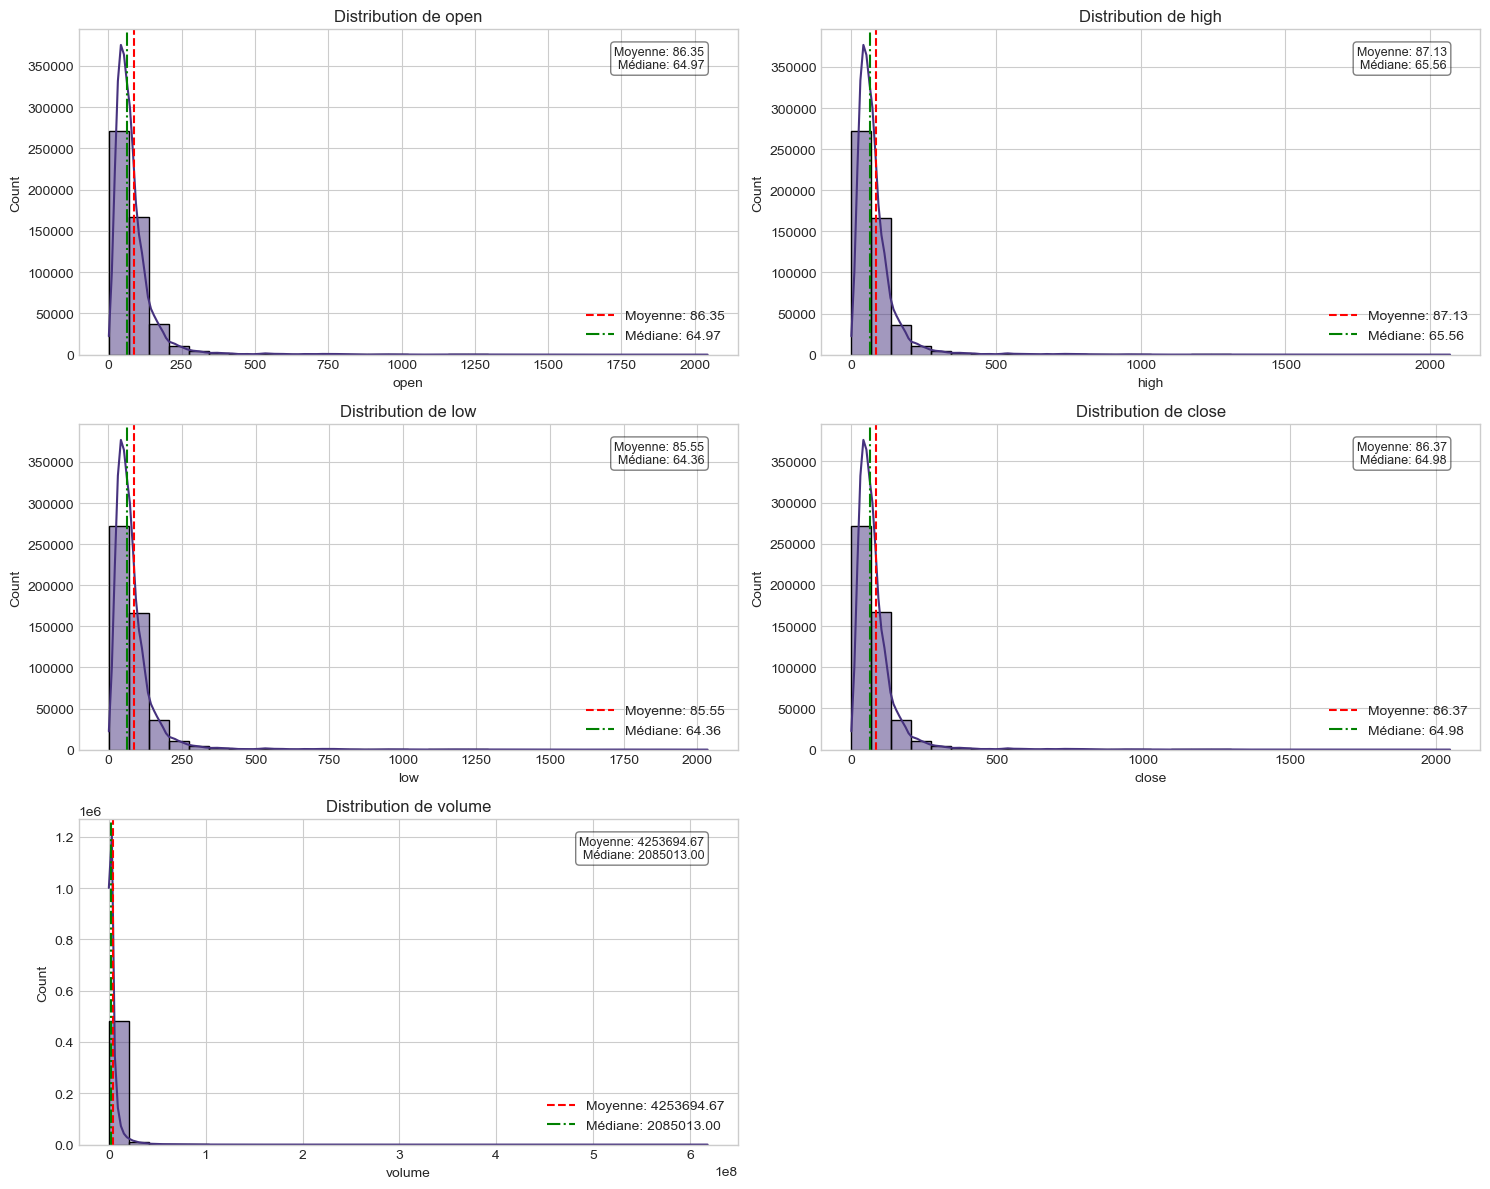

In [13]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

n_cols = 2
n_rows = (len(numeric_columns) + 1) // 2 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        sns.histplot(df[column].dropna(), kde=True, ax=axes[i], bins=30)
        
        mean_val = df[column].mean()
        median_val = df[column].median()

        # Définir stats_text ici
        stats_text = f'Moyenne: {mean_val:.2f}\nMédiane: {median_val:.2f}'
        
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Médiane: {median_val:.2f}')
        
        axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, 
                     fontsize=9, va='top', ha='right', 
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
        
        axes[i].set_title(f'Distribution de {column}')
        axes[i].legend()

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

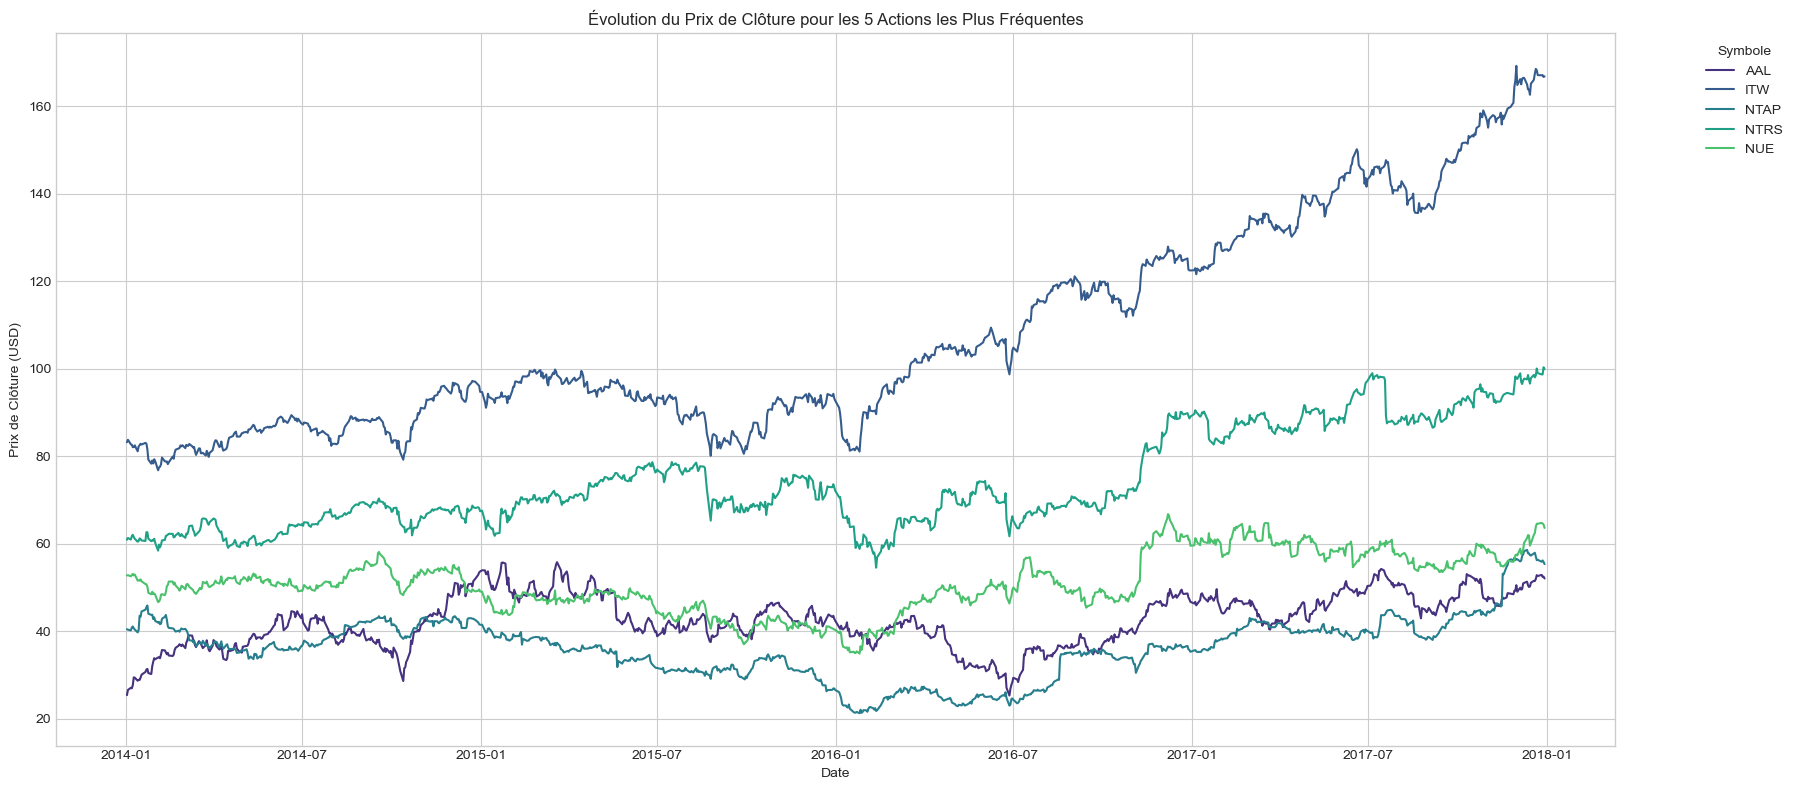

In [14]:
top_symbols = df['symbol'].value_counts().head(5).index.tolist()
plt.figure(figsize=(18, 8))
sns.lineplot(data=df[df['symbol'].isin(top_symbols)], x='date', y='close', hue='symbol')
plt.title('Évolution du Prix de Clôture pour les 5 Actions les Plus Fréquentes')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture (USD)')
plt.legend(title='Symbole', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

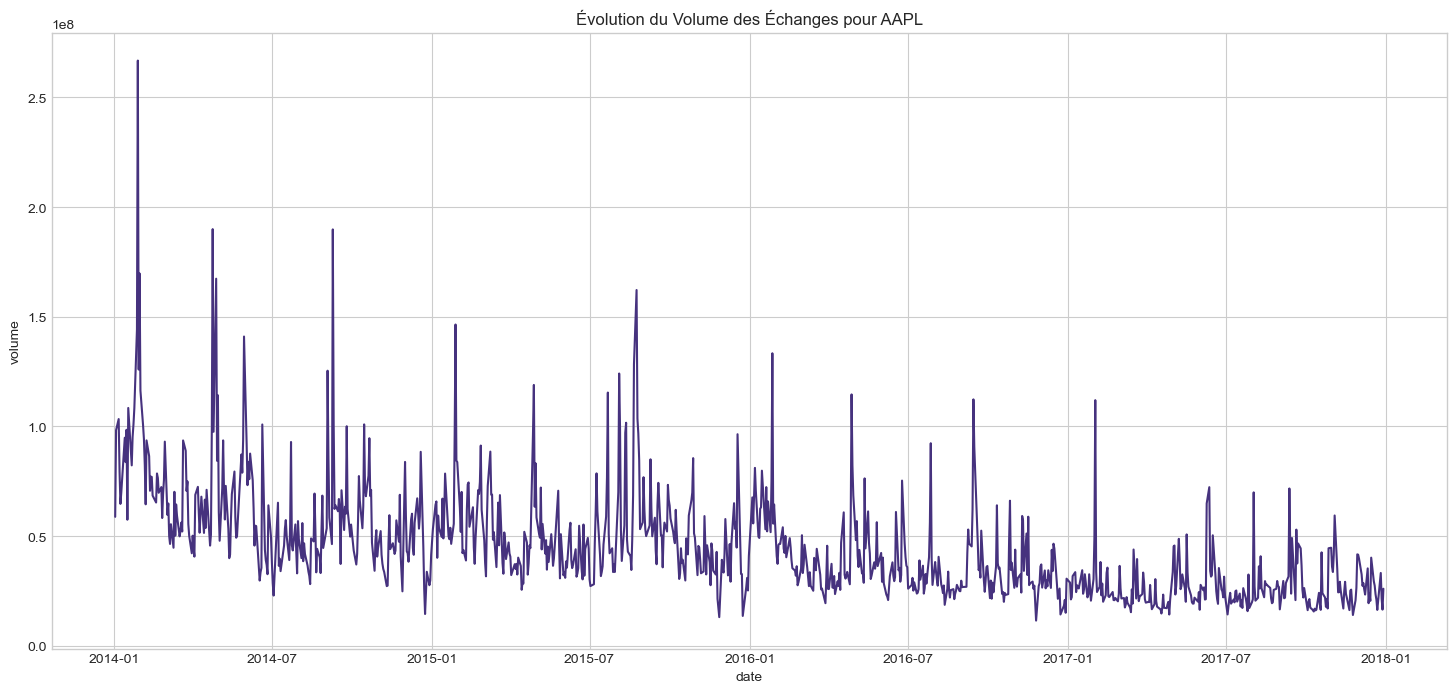

In [15]:
df_aapl = df[df['symbol'] == 'AAPL']
plt.figure(figsize=(18, 8))
plt.plot(df_aapl['date'], df_aapl['volume'], label='volume')
plt.title('Évolution du Volume des Échanges pour AAPL')
plt.xlabel('date')
plt.ylabel('volume')
plt.show()

/var/folders/lx/f19x6mgn0msd3gx_fd4zrbsr0000gn/T/ipykernel_1127/1565839092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['MA50'] = df_aapl['close'].rolling(window=50).mean()
/var/folders/lx/f19x6mgn0msd3gx_fd4zrbsr0000gn/T/ipykernel_1127/1565839092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['MA200'] = df_aapl['close'].rolling(window=200).mean()


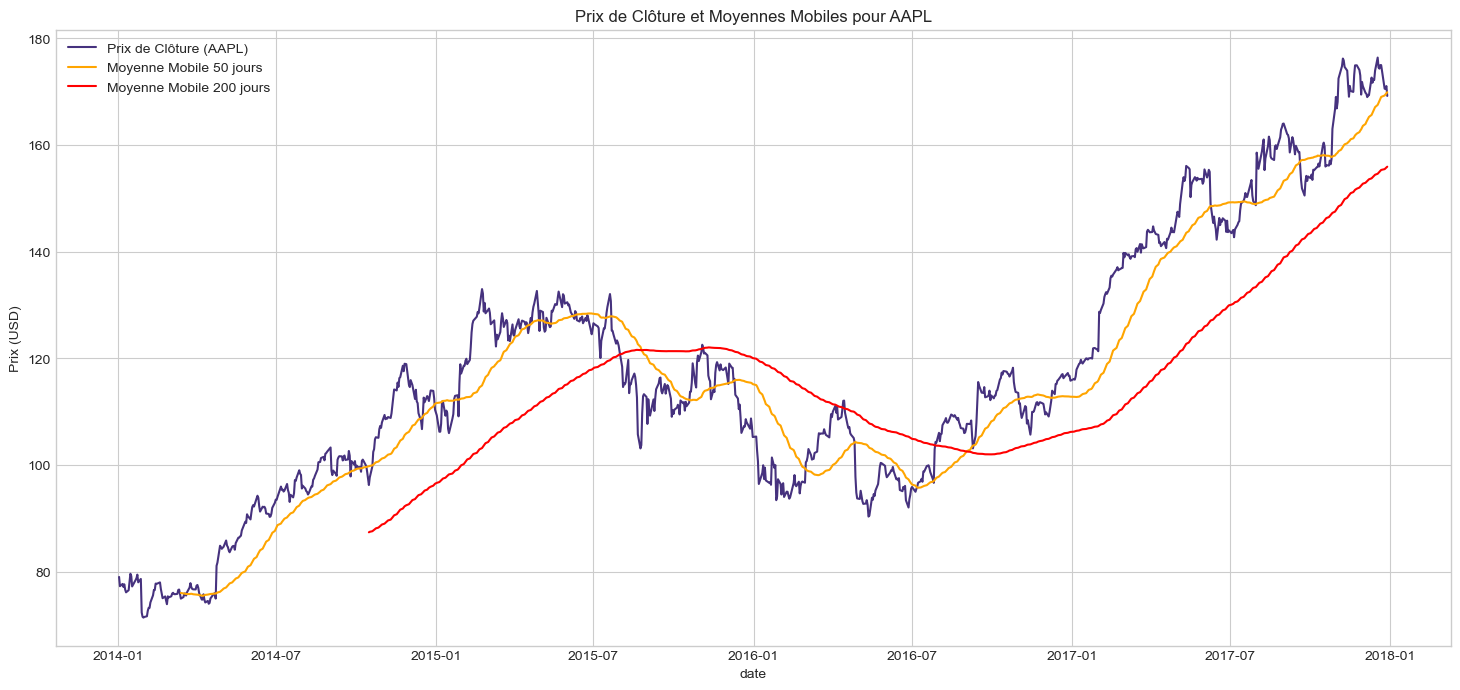

In [16]:
df_aapl['MA50'] = df_aapl['close'].rolling(window=50).mean()
df_aapl['MA200'] = df_aapl['close'].rolling(window=200).mean()

plt.figure(figsize=(18, 8))
plt.plot(df_aapl['date'], df_aapl['close'], label='Prix de Clôture (AAPL)')
plt.plot(df_aapl['date'], df_aapl['MA50'], label='Moyenne Mobile 50 jours', color='orange')
plt.plot(df_aapl['date'], df_aapl['MA200'], label='Moyenne Mobile 200 jours', color='red')
plt.title('Prix de Clôture et Moyennes Mobiles pour AAPL')
plt.xlabel('date')
plt.ylabel('Prix (USD)')
plt.legend()
plt.show()


# Explication des variables du jeu de données financières

Votre jeu de données contient des informations typiques de séries temporelles financières pour des actions ou d'autres instruments financiers. Voici une explication détaillée de chaque variable :

### 1. `symbol`
- **Description** : Identifiant unique de l'instrument financier (action, ETF, etc.)
- **Type** : Catégoriel (chaîne de caractères)
- **Exemple** : "AAPL" pour Apple, "MSFT" pour Microsoft, "GOOGL" pour Google
- **Utilisation** : Permet de distinguer les différents titres financiers dans le jeu de données

### 2. `date`
- **Description** : Date de la séance de trading
- **Type** : Datetime (temporel)
- **Format** : Généralement YYYY-MM-DD
- **Utilisation** : Permet d'analyser l'évolution temporelle et de créer des séries chronologiques

### 3. `open`
- **Description** : Prix d'ouverture de l'action au début de la séance de trading
- **Type** : Numérique (décimal)
- **Unité** : Devise (probablement USD)
- **Utilisation** : Indique le prix auquel l'action a commencé à être échangée pour la journée

### 4. `high`
- **Description** : Prix le plus élevé atteint par l'action durant la séance
- **Type** : Numérique (décimal)
- **Unité** : Devise (probablement USD)
- **Utilisation** : Mesure la limite supérieure du prix pendant la journée, indicateur de volatilité

### 5. `low`
- **Description** : Prix le plus bas atteint par l'action durant la séance
- **Type** : Numérique (décimal)
- **Unité** : Devise (probablement USD)
- **Utilisation** : Mesure la limite inférieure du prix pendant la journée, indicateur de volatilité

### 6. `close`
- **Description** : Prix de clôture de l'action à la fin de la séance de trading
- **Type** : Numérique (décimal)
- **Unité** : Devise (probablement USD)
- **Utilisation** : Souvent considéré comme le prix de référence pour la journée, utilisé pour calculer les rendements

### 7. `volume`
- **Description** : Nombre total d'actions échangées durant la séance
- **Type** : Numérique (entier)
- **Unité** : Nombre d'actions
- **Utilisation** : Indicateur de liquidité et d'intérêt du marché pour le titre

### Applications analytiques courantes :

1. **Analyse technique** : Utilisation des prix (open, high, low, close) et du volume pour identifier des tendances et des motifs
2. **Calcul de rendements** : Généralement basé sur les prix de clôture
3. **Mesures de volatilité** : Calculées à partir des écarts entre high et low
4. **Analyse de volume** : Pour comprendre la liquidité et l'intérêt des investisseurs
5. **Comparaison entre actifs** : En utilisant le symbol pour regrouper et comparer différents titres

Ces données sont typiquement appelées données OHLCV (Open-High-Low-Close-Volume) et constituent la base de nombreuses analyses financières et stratégies de trading.

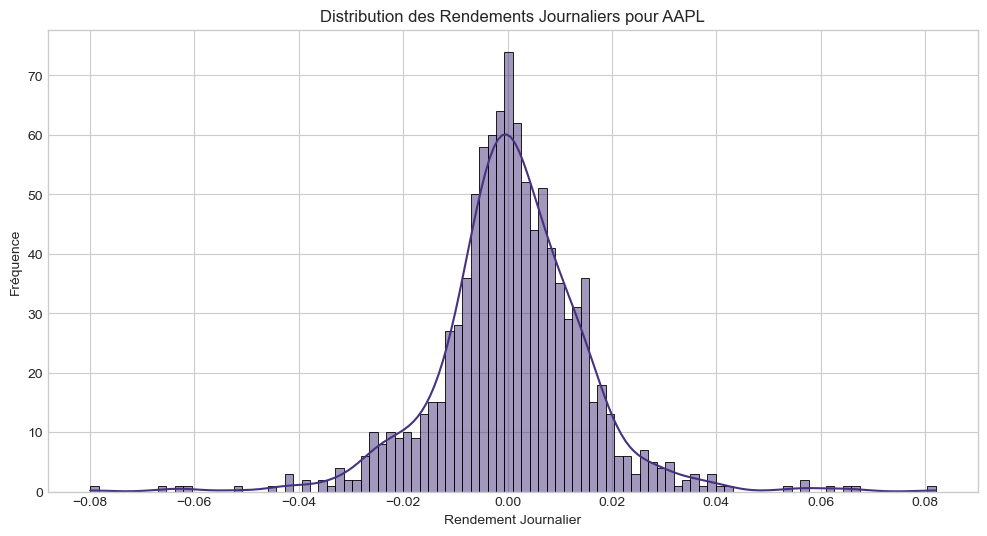

In [17]:
df['Daily_Return'] = df.groupby('symbol')['close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df[df['symbol'] == 'AAPL']['Daily_Return'].dropna(), kde=True, bins=100)
plt.title('Distribution des Rendements Journaliers pour AAPL')
plt.xlabel('Rendement Journalier')
plt.ylabel('Fréquence')
plt.show()

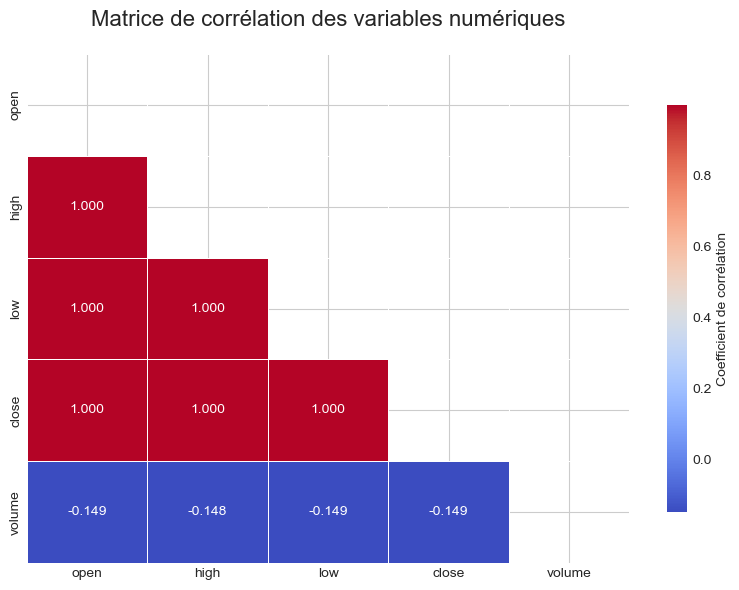


Corrélations fortes (|r| > 0.7):
close et low: 1.000
high et open: 1.000
close et high: 1.000
low et open: 1.000
low et high: 1.000
close et open: 1.000


In [18]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            annot=True,           
            fmt='.3f',            
            cmap='coolwarm',      
            mask=mask,            
            linewidths=0.5,      
            cbar_kws={'shrink': 0.8, 'label': 'Coefficient de corrélation'})

plt.title('Matrice de corrélation des variables numériques', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if strong_correlations:
    print("\nCorrélations fortes (|r| > 0.7):")
    for var1, var2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} et {var2}: {corr:.3f}")
else:
    print("\nAucune corrélation forte (|r| > 0.7) n'a été trouvée.")

moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) <= 0.7:
            moderate_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

if moderate_correlations:
    print("\nCorrélations modérées (0.5 < |r| ≤ 0.7):")
    for var1, var2, corr in sorted(moderate_correlations, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} et {var2}: {corr:.3f}")

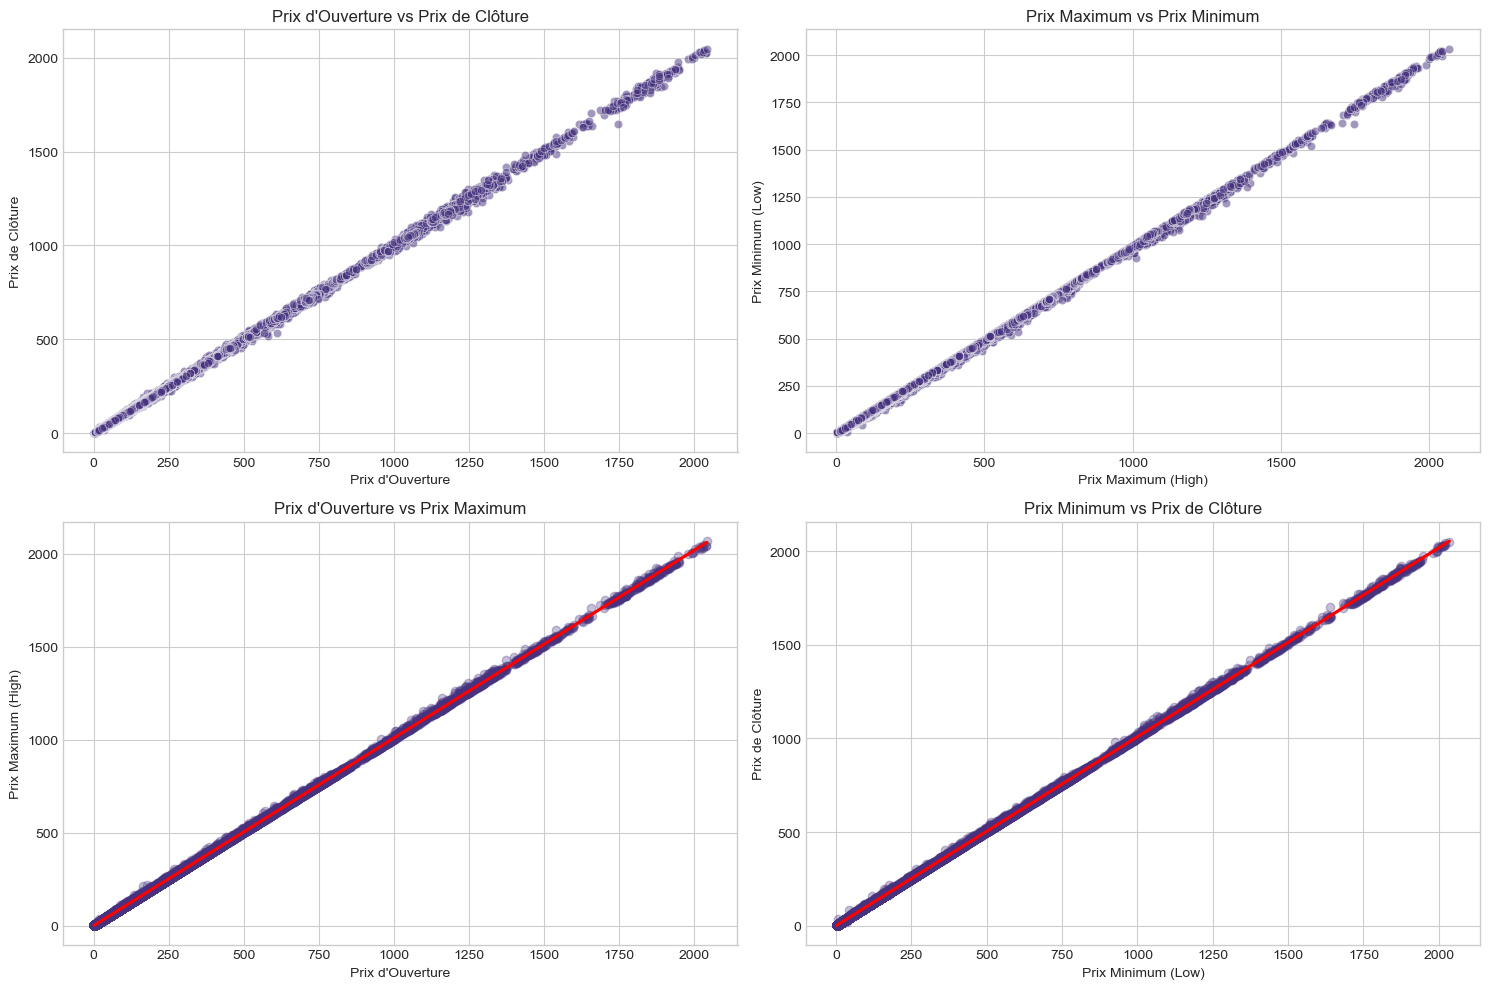

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='open', y='close', alpha=0.5)
plt.title('Prix d\'Ouverture vs Prix de Clôture', fontsize=12)
plt.xlabel('Prix d\'Ouverture')
plt.ylabel('Prix de Clôture')

# 2. Graphique de dispersion entre High et Low
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='high', y='low', alpha=0.5)
plt.title('Prix Maximum vs Prix Minimum', fontsize=12)
plt.xlabel('Prix Maximum (High)')
plt.ylabel('Prix Minimum (Low)')

# 3. Relation entre Open et High
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='open', y='high', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Prix d\'Ouverture vs Prix Maximum', fontsize=12)
plt.xlabel('Prix d\'Ouverture')
plt.ylabel('Prix Maximum (High)')

# 4. Relation entre Low et Close
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='low', y='close', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Prix Minimum vs Prix de Clôture', fontsize=12)
plt.xlabel('Prix Minimum (Low)')
plt.ylabel('Prix de Clôture')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

2025-07-15 00:39:35.469587: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
df_apple = df[df['symbol'] == 'AAPL'].copy()

df_apple['date'] = pd.to_datetime(df_apple['date'])
df_apple.set_index('date', inplace=True)

print(f"Nombre de lignes pour AAPL: {len(df_apple)}")
print(f"Période couverte: de {df_apple.index.min()} à {df_apple.index.max()}")
print("\nAperçu des données:")
df_apple.head()

Nombre de lignes pour AAPL: 1007
Période couverte: de 2014-01-02 00:00:00 à 2017-12-29 00:00:00

Aperçu des données:


,symbol,open,high,low,close,volume,Daily_Return
date,,,,,,,
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957,NaN
2014-01-03,AAPL,78.9799,79.0999,77.2042,77.2828,98303870,-0.021966
2014-01-06,AAPL,76.7785,78.1142,76.2285,77.7042,103359151,0.005453
2014-01-07,AAPL,77.7599,77.9942,76.8464,77.1481,79432766,-0.007157
2014-01-08,AAPL,76.9728,77.9371,76.9556,77.6371,64686685,0.006338


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
import platform
print("\nVersion de Python via platform:", platform.python_version())


Version de Python via platform: 3.11.13


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [25]:
data = df.filter(['close'])
dataset = data.values 

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(dataset)

In [27]:
training_data_len = int(np.ceil(len(dataset) * 0.8))

In [28]:
time_step = 60
train_data = scaled_dataset[0:training_data_len, :]

X_train = []
y_train = []

for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

In [29]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"Dimensions des données d'entraînement (X_train): {X_train.shape}")

Dimensions des données d'entraînement (X_train): (397909, 60, 1)


In [30]:
print("\n--- ÉTAPE 2 : Construction du modèle LSTM ---")

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


--- ÉTAPE 2 : Construction du modèle LSTM ---


/opt/anaconda3/envs/stockprice/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
print("\n--- ÉTAPE 3 : Entraînement du modèle ---")
history = model.fit(X_train, y_train, batch_size=32, epochs=25)


--- ÉTAPE 3 : Entraînement du modèle ---
Epoch 1/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 403s 32ms/step - loss: 0.0021
Epoch 2/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 407s 33ms/step - loss: 0.0017
Epoch 3/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 401s 32ms/step - loss: 9.6164e-04
Epoch 4/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 398s 32ms/step - loss: 7.2076e-04
Epoch 5/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 427s 34ms/step - loss: 5.1847e-04
Epoch 6/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 424s 34ms/step - loss: 3.1265e-04
Epoch 7/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 416s 33ms/step - loss: 2.4059e-04
Epoch 8/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 427s 34ms/step - loss: 2.0391e-04
Epoch 9/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 437s 35ms/step - loss: 1.7042e-04
Epoch 10/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 450s 36ms/step - loss: 1.5490e-04
Epoch 11/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 461s 37ms/step - loss: 1.4609e-04
Epoch 12/25
12435/12435 ━━━━━━━━━━━━━━━━━━━━ 442s 36ms/step - loss: 1.3348e-04
Epoch 13/25
12435/12435 ━━━


4. Génération du graphique de comparaison...


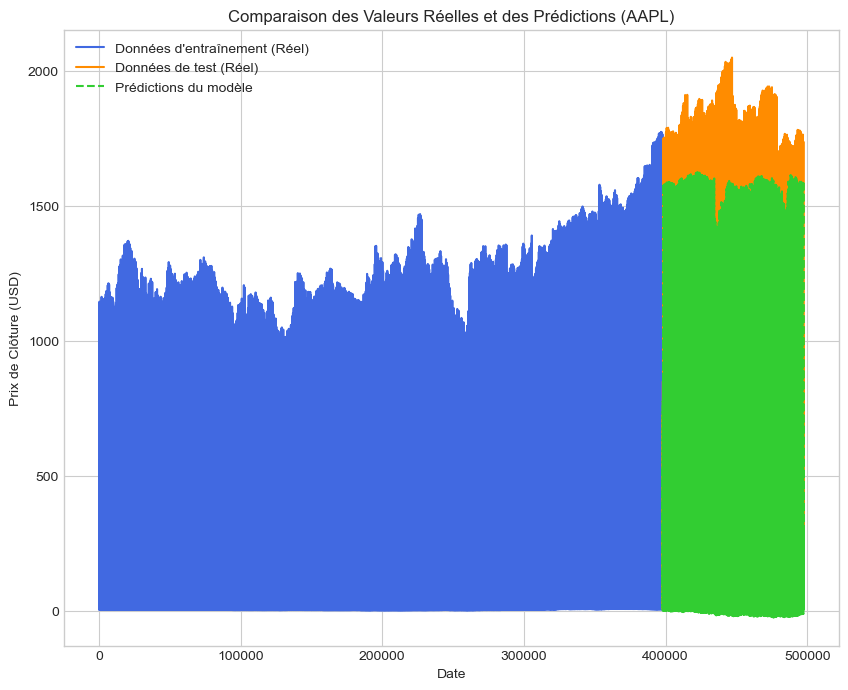

In [37]:
print("\n4. Génération du graphique de comparaison...")
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.title('Comparaison des Valeurs Réelles et des Prédictions (AAPL)')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture (USD)')
plt.plot(train['close'], label='Données d\'entraînement (Réel)', color='royalblue')
plt.plot(valid['close'], label='Données de test (Réel)', color='darkorange')
plt.plot(valid['Predictions'], label='Prédictions du modèle', color='limegreen', linestyle='--')

plt.legend()
plt.show()

In [36]:
print("\n3. Évaluation de la performance du modèle :")
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Erreur Quadratique Moyenne (RMSE): {rmse:.2f} USD")

y_test_safe = np.where(y_test == 0, 1e-6, y_test)
mape = np.mean(np.abs((y_test - predictions) / y_test_safe)) * 100
print(f"Erreur Absolue Moyenne en Pourcentage (MAPE): {mape:.2f}%")


3. Évaluation de la performance du modèle :
Erreur Quadratique Moyenne (RMSE): 51.98 USD
Erreur Absolue Moyenne en Pourcentage (MAPE): 41.51%
